In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [57]:
data = pd.read_csv("../data/processed/radius_500_size_1000.csv", index_col=0)

In [58]:
X, y = data.drop("cost", axis=1), data["cost"]

In [59]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
y_pred = model.predict(X_val)

In [62]:
print(y_pred[:5])
print(y_val[:5])

[17674.72273191 18892.13740973 16776.25178691 18333.66199056
 17281.96880178]
521    19236
737    19236
740    18744
660    17893
411    17893
Name: cost, dtype: int64


In [63]:
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"MSE: {mse:.3f}")
print(f"R2: {r2:.3f}\n")

MSE: 3688511.604
R2: 0.210



In [64]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)

           Feature   Coefficient
6       attraction  7.974245e+02
13            dorm  5.200935e+02
4         pharmacy  5.179704e+02
7          theatre  2.953989e+02
8             tree  6.821210e-13
9             bush  0.000000e+00
10          forest  0.000000e+00
2             stop -1.190921e+01
5              aed -5.481696e+01
11  police station -2.275414e+02
12           hotel -4.056787e+02
3     bike station -9.170484e+02
1              lon -3.316376e+03
0              lat -1.397284e+04


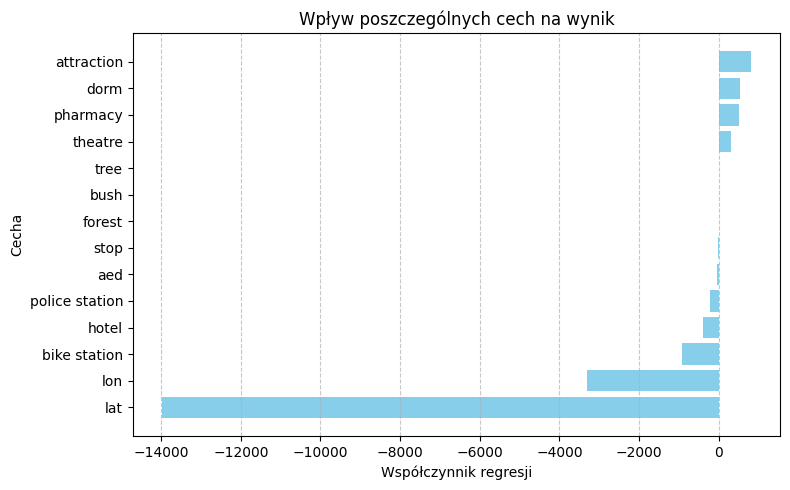

In [65]:
plt.figure(figsize=(8, 5))
plt.barh(coefficients["Feature"], coefficients["Coefficient"], color='skyblue')
plt.title("Wpływ poszczególnych cech na wynik")
plt.xlabel("Współczynnik regresji")
plt.ylabel("Cecha")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [66]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)